In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

BLACK = 0
MEDIUM_GRAY = 127
WHITE = 255

MAX = 256

def readImage(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def getLocalTime() -> str:
    named_tuple = time.localtime() # get struct_time
    return time.strftime("%d/%m/%Y, %H:%M:%S", named_tuple)


def showImage(image, cmap = 'gray') -> None:
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)


def showImages(images, cmap = 'gray') -> None:
    _, axs = plt.subplots(nrows=1, ncols=len(images))

    for i in range(len(images)):
        axs[i].imshow(images[i], cmap = cmap, vmin = BLACK, vmax = WHITE)

    plt.tight_layout()

def saveImage(image, filename = 'result', cmap = 'gray', mode = 'sync') -> None:    
    ax = plt.subplots()[1]
    ax.imshow(image, cmap = cmap, vmin = BLACK, vmax = WHITE)
    plt.savefig(filename, bbox_inches = 'tight', pad_inches = 0)

    if mode == 'sync':
        plt.show()

def binarify(image, condition):
    result = np.zeros(image.shape)
    height, width = image.shape
    for i in range(0, height):
        for j in range(0, width):
            result[i][j] = condition(image[i][j]) * 255
            
    return result



In [7]:
def labeler(image):
    height, width = image.shape
    label = 1
    neighbors = []
    point = current = {}
    labeledImage = np.zeros(image.shape)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            point = { 'x': i, 'y': j }

            if ableToLabel(image, labeledImage, point):
                labeledImage[i][j] = label

                # Empilha o ponto atual da imagem
                neighbors.append(point)
                while len(neighbors) > 0:
                    # desempilha os visinhos
                    current = neighbors.pop()

                    point = {
                        'x': current['x'] - 1,
                        'y': current['y']
                    }

                    # procura por vizinhos acima que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'] + 1,
                        'y': current['y'],
                    }

                    # procura por vizinhos abaixo que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'],
                        'y': current['y'] - 1,
                    }

                    # procura por vizinhos a esquerda que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'],
                        'y': current['y'] + 1,
                    }

                    # procura por vizinhos a direita que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'] - 1,
                        'y': current['y'] - 1
                    }

                    # procura por vizinhos acima que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'] + 1,
                        'y': current['y'] - 1,
                    }

                    # procura por vizinhos a esquerda que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'] + 1,
                        'y': current['y'] - 1,
                    }

                    # procura por vizinhos abaixo que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)

                    point = {
                        'x': current['x'] + 1,
                        'y': current['y'] + 1,
                    }

                    # procura por vizinhos a direita que respeitam a condição Q
                    labelNeighbors(image, labeledImage, point, neighbors, label)
                label += 1

    return label - 1


def labelNeighbors(image, labeledImage, point, neighbors, label):
    if ableToLabel(image, labeledImage, point):
        labeledImage[point['x']][point['y']] = label
        neighbors.append(point)

def colorCriterion(image, point):
    height, width = image.shape
    return point['x'] >= 0 \
        and point['y'] >= 0 \
        and point['x'] < height \
        and point['y'] < width \
        and image[point['x']][point['y']] == 255

def unlabeled(labeledImage, point):
    return labeledImage[point['x']][point['y']] == 0

def ableToLabel(image, labeledImage, point):
    return colorCriterion(image, point) and unlabeled(labeledImage, point)

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


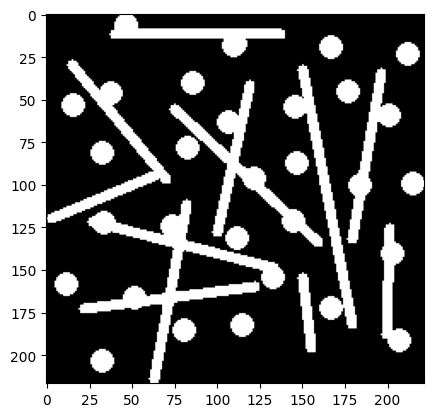

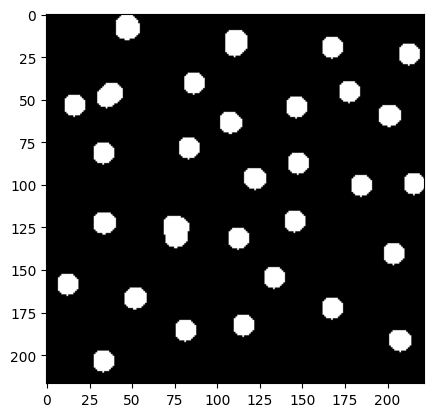

In [8]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12, 12))
img1_circles = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)

# img1_lines = img1 - cv2.dilate(img1_circles, kernel, iterations = 1)

showImage(img1)
showImage(img1_circles)
# showImage(img1_lines)


2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


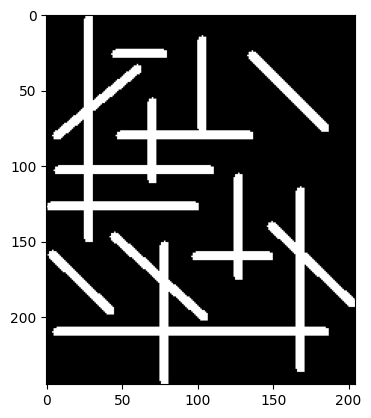

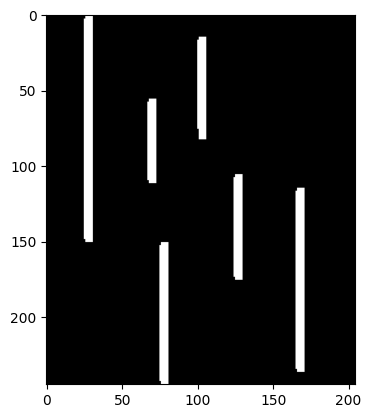

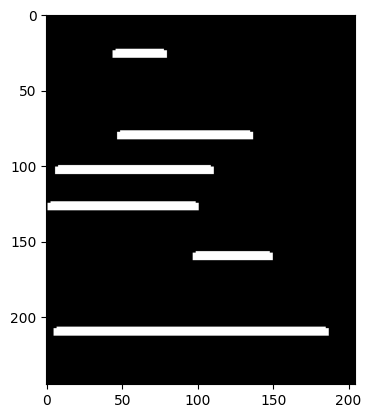

In [9]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((9, 3), np.uint64) 
img2_vertical = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)

kernel = np.ones((5, 15), np.uint64) 
img2_horizontal = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)

showImage(img2)
showImage(img2_vertical)
showImage(img2_horizontal)

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

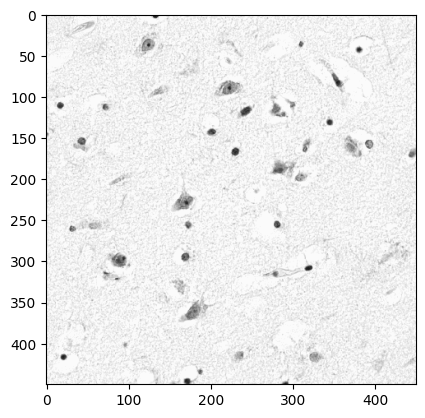

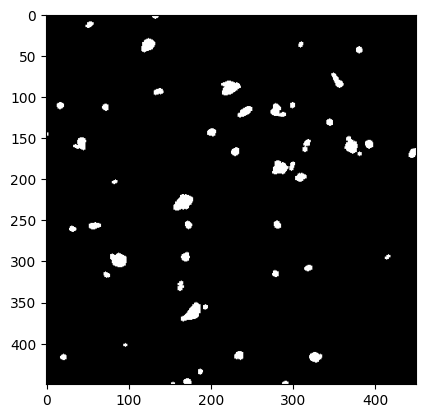

In [6]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

def applyOpening(image, size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
def binarifyAndApplyOpening(image):
    # thr, bin_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    bin_image = binarify(image, lambda c: c < 210)
    return applyOpening(bin_image, 5)

showImage(img3)
showImage(binarifyAndApplyOpening(img3))

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

Nro Objetos
88
87


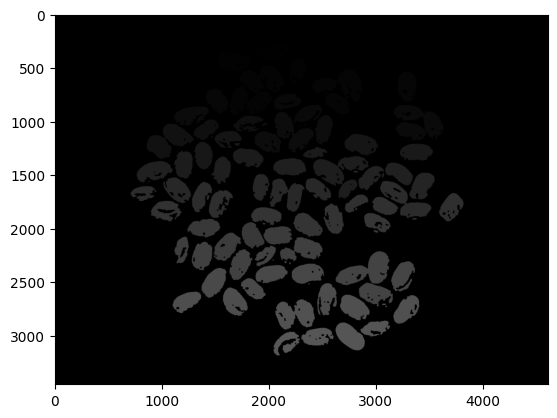

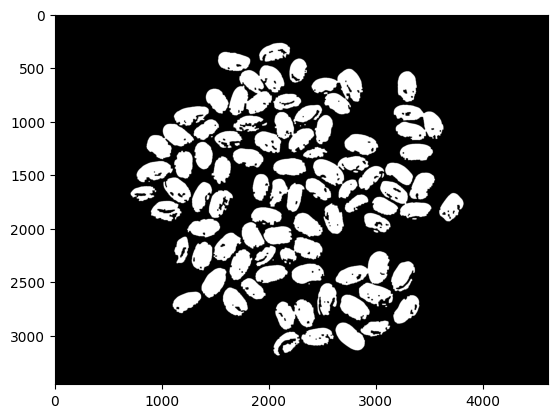

In [18]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((10,10), np.uint64) 

thr_img4, img4_binary = cv2.threshold(img4, 127, 255, cv2.THRESH_BINARY) # threshold simples
# thr_img4, img4_binary = cv2.threshold(img4, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # threshold otsu

img4_opened = cv2.morphologyEx(img4_binary, cv2.MORPH_OPEN, kernel, iterations = 1)
img4_closed = cv2.morphologyEx(img4_opened, cv2.MORPH_CLOSE, kernel)

num_components, components = cv2.connectedComponents(img4_closed)

showImage(components)
showImage(img4_closed)

print('Nro Objetos')
print(num_components)
# print(labeler(img4_closed))